# Introduction to Interactive Analysis with Spark

## Table of Content
1. [Initialization](#1.-Initialization)
2. [Creating an RDD](#2.-Creating-an-RDD)
3. [Getting Help](#3.-Getting-Help)
4. [Action on a Dataset](#4.-Action-on-a-Dataset)
5. [Dataset Transformation](#5.-Dataset-Transformation)
6. [Caching a Dataset](#6.-Caching-a-Dataset)
7. [Filtering a Dataset](#7.-Filtering-a-Dataset)
8. [Reduction Operation](#8.-Reduction-Operation)  
  8.1 [Transforming in Key-Value Pairs](#8.1-Transforming-in-Key-Value-Pairs)  
  8.2 [Filtering Unrelated Entries](#8.2-Filtering-Unrelated-Entries)  
  8.3 [Aggregating the Results by Key](#8.3-Aggregating-the-Results-by-Key)  
  8.4 [Computing the Most Frequent Languages](#8.4-Computing-the-Most-Frequent-Languages)    
  8.5 [Bar Chart](#8.5.-Bar-Chart)
9. [Ending the Analysis](#9.-Ending-the-Analysis)
10. [Recap](#10.-Recap)
11. [References](#11.-References)

## List of Exercises
1. [Exercise 1: How to Cache?](#Exercise-1)
2. [Exercise 2: How to Peek?](#Exercise-2)
3. [Exercise 3: How to Filter?](#Exercise-3)
4. [Exercise 4: How to Sort?](#Exercise-4)

## 1. Initialization

In this notebook, we will use Spark to analyze brievly a simple structured dataset.

First, we need to import Spark's Python module named `pyspark`.

In [1]:
import pyspark
import spark_helper # homemade module to ease the workshop progress

Then, we need to create a SparkContext.

In [2]:
try:
    sc = pyspark.SparkContext()
except ValueError:
    print("Warning : a SparkContext already exists.")

If we execute Spark locally, the context creation can be used to Spark. It is also possible to launch Spark and the Python interpreter / notebook using the script named `pyspark`. In this case, the context will already be created (under the name `sc`) and a `ValueError` exception is raised when we try to create a second context. The exception has not effect so we simply catch it and display a warning message.

We can consult the dashboard of our Spark application at the link computed by the next cell.

In [3]:
print("Spark app's dashboard link: {}".format(spark_helper.get_app_dashboard_url(sc)))

Spark app's dashboard link: http://localhost:4040


## 2. Creating an RDD

We will now create an RDD from text files representing the page visits data of Wikipedia. This data should be in the folder `data/pagecounts`. 

The notebook [0-Configuration.ipynb](0-Configuration.ipynb) can assist you in downloading the files.

In [4]:
pagecounts = sc.textFile('data/pagecounts/*.gz')

A [pagecounts](https://dumps.wikimedia.org/other/pagecounts-raw/) file looks like this  
```
af Spesiaal:Onlangse_wysigings 3 101681
af Spesiaal:RecentChanges 2 2248
af Suid-Afrika 1 30698
af Tuisblad 14 155257 
af Varkgriep 4 42236
af Wikipedia 2 32796
```

It is a tabular file, where each line is a distinct entry and the columns represent
2. the project name (language);
3. the page title;
4. the number of requests;
5. the size of the content returned.

We can look at a few entries with the RDD's method `take` to get the first `K` elements of the dataset. Here, `K = 10`.

In [5]:
first10 = pagecounts.take(10)
print(first10)

['aa.b Main_Page 3 16288', 'aa.b Special:RecentChangesLinked/User:Az1568 1 5745', 'aa.b Special:Recentchangeslinked/User:Az1568 1 1013', 'aa.b Special:Statistics 1 840', 'aa.b Template:Delete 1 26601', 'aa.d Main_Page 2 5442', 'aa Main_Page 4 19955', 'aa User:Alecs.bot 1 13388', 'ab %D0%90%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82 1 465', 'ab %D0%98%D1%85%D0%B0%D0%B4%D0%BE%D1%83_%D0%B0%D0%B4%D0%B0%D2%9F%D1%8C%D0%B0 1 16098']


Since `take` returns a list, we can iterate on the result and print it "prettily".

In [6]:
for item in first10:
    print(item)

aa.b Main_Page 3 16288
aa.b Special:RecentChangesLinked/User:Az1568 1 5745
aa.b Special:Recentchangeslinked/User:Az1568 1 1013
aa.b Special:Statistics 1 840
aa.b Template:Delete 1 26601
aa.d Main_Page 2 5442
aa Main_Page 4 19955
aa User:Alecs.bot 1 13388
ab %D0%90%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82 1 465
ab %D0%98%D1%85%D0%B0%D0%B4%D0%BE%D1%83_%D0%B0%D0%B4%D0%B0%D2%9F%D1%8C%D0%B0 1 16098


## 3. Getting Help

At any moment, you can get help on a Python object using the `help()` function. For example, if we want to know more aboud the RDD's `take()` method.

In [7]:
help(pagecounts.take)

Help on method take in module pyspark.rdd:

take(num) method of pyspark.rdd.RDD instance
    Take the first num elements of the RDD.
    
    It works by first scanning one partition, and use the results from
    that partition to estimate the number of additional partitions needed
    to satisfy the limit.
    
    Translated from the Scala implementation in RDD#take().
    
    >>> sc.parallelize([2, 3, 4, 5, 6]).cache().take(2)
    [2, 3]
    >>> sc.parallelize([2, 3, 4, 5, 6]).take(10)
    [2, 3, 4, 5, 6]
    >>> sc.parallelize(range(100), 100).filter(lambda x: x > 90).take(3)
    [91, 92, 93]



## 4. Action on a Dataset

The `take()` method is one among multiple available *actions* we apply on an RDD. An exhaustive list of action is available at the following URL:
https://spark.apache.org/docs/latest/programming-guide.html#actions

In case where we do not want to leave the notebook tab, we can call `help()` directly on an RDD.

In [8]:
help(pagecounts)

Help on RDD in module pyspark.rdd object:

class RDD(builtins.object)
 |  A Resilient Distributed Dataset (RDD), the basic abstraction in Spark.
 |  Represents an immutable, partitioned collection of elements that can be
 |  operated on in parallel.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |      Return the union of this RDD and another one.
 |      
 |      >>> rdd = sc.parallelize([1, 1, 2, 3])
 |      >>> (rdd + rdd).collect()
 |      [1, 1, 2, 3, 1, 1, 2, 3]
 |  
 |  __getnewargs__(self)
 |  
 |  __init__(self, jrdd, ctx, jrdd_deserializer=AutoBatchedSerializer(PickleSerializer()))
 |  
 |  __repr__(self)
 |  
 |  aggregate(self, zeroValue, seqOp, combOp)
 |      Aggregate the elements of each partition, and then the results for all
 |      the partitions, using a given combine functions and a neutral "zero
 |      value."
 |      
 |      The functions C{op(t1, t2)} is allowed to modify C{t1} and return it
 |      as its result value to avoid object allocation

Among the available action, lets take the method `count()`. What does it return?

In [9]:
pagecounts.count()

11268665

Each action apply on an RDD leads to the creation of one or many task and the production of a result. Every task executed in the same app can be visualised in the Spark's dashboard. In this interface, we can track the progress of a task, and check different performance measures on the task, for example its duration and cache statistics.

## 5. Dataset Transformation

If we display the 10 first element of our dataset that we retrieved earlier.

In [10]:
first10

['aa.b Main_Page 3 16288',
 'aa.b Special:RecentChangesLinked/User:Az1568 1 5745',
 'aa.b Special:Recentchangeslinked/User:Az1568 1 1013',
 'aa.b Special:Statistics 1 840',
 'aa.b Template:Delete 1 26601',
 'aa.d Main_Page 2 5442',
 'aa Main_Page 4 19955',
 'aa User:Alecs.bot 1 13388',
 'ab %D0%90%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82 1 465',
 'ab %D0%98%D1%85%D0%B0%D0%B4%D0%BE%D1%83_%D0%B0%D0%B4%D0%B0%D2%9F%D1%8C%D0%B0 1 16098']

We realise that the RDD is composed of each line of input text files, but that is not possible to access to individual column. **Why?**

In [11]:
first1 = pagecounts.first()
first1

'aa.b Main_Page 3 16288'

The action `first()` as its name states, return the first entry of the dataset. We see that each entry is a single string. We will need to transform that first RDD in a second in order to divide each string in a list of 4 elements. To do this, we will use the method `split()` of Python string object.

We first test it on the dataset first entry.

In [12]:
str.split(first1)

['aa.b', 'Main_Page', '3', '16288']

We now want to apply this transformation to every RDD's entry. The RDD's method `map(func)` returns a new distributed dataset formed by passing each element of the source through a function *func*.

In [13]:
pagecounts_tab = pagecounts.map(str.split)

The evaluation of this transformation is *lazy*. Spark does not compute anything as long as a result is not requested by an action. To convince yourself, execute the preceding cell, then visit the Spark dashboard. You should see that no job have been added to the list.

In [14]:
print("Spark app's dashboard link: {}/jobs".format(spark_helper.get_app_dashboard_url(sc)))

Spark app's dashboard link: http://localhost:4040/jobs


## 6. Caching a Dataset

When we expect to operate frequently on the same dataset, it can be useful to tell Spark to keep it in memory.

To do so, we use the `cache()` method.

In [15]:
pagecounts_tab.cache()

PythonRDD[5] at RDD at PythonRDD.scala:43

The RDDs stored in memory are displayed in the **Storage** section of Spark web interface. Note that datasets are not loaded in memory until an action is called on them. 

In [16]:
print("Spark app's dashboard link: {}/storage".format(spark_helper.get_app_dashboard_url(sc)))

Spark app's dashboard link: http://localhost:4040/storage


To free memory used by cached RDD that we no longer need, we need to call the `unpersist()` method.

In [17]:
pagecounts_tab.unpersist()

PythonRDD[5] at RDD at PythonRDD.scala:43

## 7. Filtering a Dataset

Since we now have an RDD that is easier to manipulate, we can star the analysis. First, we take interest in page s rom Wikipedia English. The following line filter the last RDD we created , eepsing nly the entries written in English.

Try to answer the following quiz before executing the cell:  
* What sort of argument takes the `filter()` method?
* What type is `x`?
* Is filter an action or a transformation?
* What does `filter()` return?

In [18]:
pagecounts_en = pagecounts_tab.filter(lambda x: x[0] == "en")

#### Exercise 1
**Write the code to cache the new RDD in the following cell**.

In [19]:
pagecounts_en.cache()

PythonRDD[6] at RDD at PythonRDD.scala:43

We can now count the number of pages in English. The macro notebook `%time` will indicate how long it took Spark to count the number of entries in the RDD.

In [20]:
%time pagecounts_en.count()

CPU times: user 16 ms, sys: 4 ms, total: 20 ms
Wall time: 28.6 s


4993702

Since we told Spark to keep the dataset in memory, the time required to count the number of pages should be shorter for the second execution.

In [21]:
%time pagecounts_en.count()

CPU times: user 4 ms, sys: 4 ms, total: 8 ms
Wall time: 3.2 s


4993702

Since we committed an action on a cached RDD, it should now figure in the **Storage** section of our app's dashboard.

In [22]:
print("Spark app's dashboard link: {}/storage".format(spark_helper.get_app_dashboard_url(sc)))

Spark app's dashboard link: http://localhost:4040/storage


## 8. Reduction Operation

We are now interested in producing a bar chart of the number of pages request per language in our dataset. In order to do this, we will need to aggregate the number of requested pages for each language. This type of operation is called a *reduction*.

### 8.1 Transforming in Key-Value Pairs

First, we transform our dataset to only keep the language and the number of requests. Furthermore, the number of request field is a string, we therefore use `int()` to convert it in an integer.

In [23]:
pagecounts_tuple = pagecounts_tab.map(lambda entry: (entry[0], int(entry[2])))

#### Exercise 2
**Take a look at the first 5 elements of the new RDD to confirm the transformation is correct.**

In [24]:
pagecounts_tuple.take(5)

[('aa.b', 3), ('aa.b', 1), ('aa.b', 1), ('aa.b', 1), ('aa.b', 1)]

Spark provides functions to work with key-value pairs. In our new dataset, the key is the language and the number of requests the value. The `key()` method of RDD returns a new RDD composed only of the keys.

In [25]:
pagecounts_tuple.keys().take(5)

['aa.b', 'aa.b', 'aa.b', 'aa.b', 'aa.b']

A `values()` method is also available.

In [26]:
pagecounts_tuple.values().take(5)

[3, 1, 1, 1, 1]

### 8.2 Filtering Unrelated Entries

As we observed, the key of our RDD sometimes has the form "xx.x". The project suffix ".x" corresponds to the project name. The following abbreviations are used:  
```
wikibooks: ".b"
wiktionary: ".d"
wikimedia: ".m"
wikipedia mobile: ".mw"
wikinews: ".n"
wikiquote: ".q"
wikisource: ".s"
wikiversity: ".v"
mediawiki: ".w"
```
Projects without a period and a following character are wikipedia projects. 

#### Exercise 3
**Design a filter to only keep the pages that are Wikipedia projects.**

In [27]:
pagecounts_filt = pagecounts_tuple.filter(lambda x: len(x[0]) == 2)

### 8.3 Aggregating the Results by Key

We want to compute the number of pages equested for each language. In order to do this, we use the `reduceByKey()` method. As its name states, this function expect the RDD to be composed of key-value pairs.

When called on a dataset of $(K, V)$ pairs, `reduceByKey()` returns a dataset of $(K, V)$ pairs where the values for each key are aggregated using the given reduce function *func*, which must be of type $(V,V) \rightarrow V$.

Since we want the total number of pages er language, our aggregating function will be the addition.

In [28]:
lang_pagecounts = pagecounts_filt.reduceByKey(lambda x, y: x + y).cache()

`reduceByKey()` is a transformation, therefore the result is a new RDD. To visualize the entire content of the latter, we can use the `collect()` method.

In [29]:
lang_pagecounts.collect()

[('sc', 818),
 ('ay', 321),
 ('uz', 3457),
 ('th', 35368),
 ('ja', 2953787),
 ('lg', 66),
 ('fo', 2873),
 ('tl', 5440),
 ('sh', 4809),
 ('sv', 93380),
 ('ak', 62),
 ('nb', 108),
 ('st', 100),
 ('it', 510621),
 ('rw', 72),
 ('ss', 133),
 ('su', 2362),
 ('sn', 42),
 ('ps', 1487),
 ('cs', 44709),
 ('ny', 64),
 ('co', 995),
 ('id', 62539),
 ('az', 3282),
 ('as', 507),
 ('ik', 68),
 ('mn', 1885),
 ('jp', 113),
 ('sm', 167),
 ('os', 2256),
 ('zu', 161),
 ('ts', 157),
 ('da', 22312),
 ('wo', 1615),
 ('ka', 6655),
 ('ne', 601),
 ('gu', 1771),
 ('ig', 309),
 ('sl', 21624),
 ('de', 1047880),
 ('sq', 6142),
 ('dz', 110),
 ('ff', 419),
 ('eu', 9447),
 ('tt', 1822),
 ('ch', 522),
 ('rm', 816),
 ('gl', 10335),
 ('yi', 3734),
 ('ug', 622),
 ('kn', 2429),
 ('ce', 1118),
 ('cu', 910),
 ('ku', 4204),
 ('ky', 348),
 ('kw', 866),
 ('hr', 23042),
 ('ng', 42),
 ('ti', 59),
 ('ty', 1040),
 ('lt', 29282),
 ('ln', 1639),
 ('es', 2520839),
 ('no', 45462),
 ('kr', 110),
 ('tw', 48),
 ('fy', 2224),
 ('rn', 38),
 

### 8.4 Computing the Most Frequent Languages

We now wish to determine the 5 most frequent languages requested during the period observed. In order to do this, multiple solutions are available to us.

#### 8.4.1. Sort locally

In [30]:
top5 = sorted(lang_pagecounts.collect(), key=lambda x: x[1], reverse=True)[:5]
print(top5)

[('en', 25576174), ('ja', 2953787), ('es', 2520839), ('de', 1047880), ('pt', 950423)]


#### 8.4.2 Ask Spark to sort the dataset using the `sortBy()` method.

In [31]:
top5 = lang_pagecounts.sortBy(keyfunc=lambda x: x[1], ascending=False).take(5)
print(top5)

[('en', 25576174), ('ja', 2953787), ('es', 2520839), ('de', 1047880), ('pt', 950423)]


#### 8.4.3 Ask Spark for the top 5 using the `top()` method.

In [32]:
top5 = lang_pagecounts.top(5, lambda x: x[1])
print(top5)

[('en', 25576174), ('ja', 2953787), ('es', 2520839), ('de', 1047880), ('pt', 950423)]


#### Exercise 4
**Can you think of another method to get the same result?**

In [36]:
top5 = lang_pagecounts.takeOrdered(5, lambda x: -x[1])
print(top5)

[('en', 25576174), ('ja', 2953787), ('es', 2520839), ('de', 1047880), ('pt', 950423)]


### 8.5 Bar Chart

Since we are in an interactive notebook, we can use Python plotting library `matplotlib` to plot our bar chart.

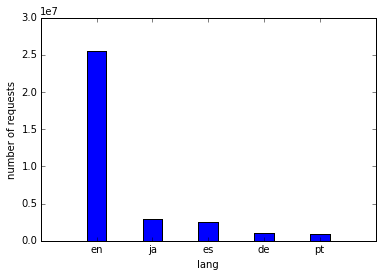

In [37]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
top5_t = list(zip(*top5))
ax.bar(range(len(top5_t[0])), top5_t[1], width=0.35, align="center")
ax.set_xticks(range(len(top5_t[0])))
ax.set_xticklabels(top5_t[0])
ax.set_xlabel("lang")
ax.set_ylabel(u"number of requests")

## 9. Ending the Analysis

Once the analysis is done, we need to tell Spark to free the resources and destroy the context using the `SparkContext`'s method `stop()`.

In [38]:
sc.stop()

## 10. Recap

In this notebook, we used and learned about the following parts of 
**[Python Spark API](http://spark.apache.org/docs/latest/api/python/)**:
1. Import Spark Python module: 
**[`import pyspark`](http://spark.apache.org/docs/latest/api/python/pyspark.html)**
2. Create a SparkContext:
**[`pyspark.SparkContext()`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.SparkContext)**
2. Create an RDD from text files:
**[`SparkContext.textFile(path)`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.SparkContext.textFile)**
3. Take a the first *num* elements from an RDD: 
**[`Rdd.take(num)`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.take)**
3. Count the number of elements in an RDD: 
**[`Rdd.count()`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.count)**
4. Retrieve the first element of an RDD: 
**[`RDD.first()`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.first)**
5. Apply a transformation on each element of an RDD:
**[`RDD.map(func)`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.map)**
4. Cache an RDD:
**[`RDD.cache()`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.cache)**
5. Remove an RDD from memory: 
**[`RDD.unpersist()`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.unpersist)**
5. Filter an RDD:
**[`RDD.filter(func)`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.filter)**
6. Merge the values for each keys: 
**[`RDD.reduceByKey(func)`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.reduceByKey)**
7. Get all elements of an RDD: 
**[`RDD.collect()`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.collect)**
8. Sort the elements of an RDD:
**[`RDD.sortBy(func)`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.sortBy)**
9. Get the top $N$ elements from an RDD:
**[`RDD.top(N)`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.top)**
10. End the SparkContext:
**[`SparkContext.stop()`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.SparkContext.stop)**

## 11. References

* [Berkeley AmpCamp 5 - Data Exploration Using Spark](http://ampcamp.berkeley.edu/5/exercises/data-exploration-using-spark.html)
* [edX - Introduction to Big Data with Apache Spark](https://www.edx.org/course/introduction-big-data-apache-spark-uc-berkeleyx-cs100-1x)
* [edX - Introduction to Big Data with Apache Spark (Github repo)](https://github.com/spark-mooc/mooc-setup)